# Create artificial female locomotor traces

Using either linear song filter or linear song filter + nonlinearity. Additive Gaussian noise.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal, stats

from disp import plot_b, set_plot

NTR = 276
FPS = 30.03
DT = 1/FPS
SONG_FILE = 'data/simple/c_song_f_behav.csv'

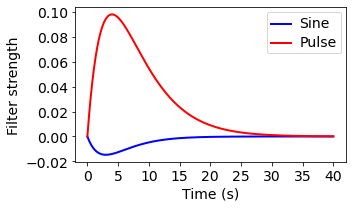

In [2]:
# make filters
T_H = np.arange(0, 40, DT)
H_S = -2*T_H*np.exp(-T_H/3)/5
H_P = 2*T_H*np.exp(-T_H/4)

fig, ax = plt.subplots(1, 1, figsize=(5, 3), tight_layout=True)
ax.plot(T_H, H_S*DT, c='b', lw=2)
ax.plot(T_H, H_P*DT, c='r', lw=2)
ax.legend(['Sine', 'Pulse'])
set_plot(ax, x_label='Time (s)', y_label='Filter strength', font_size=14)

In [3]:
df_load = pd.read_csv(SONG_FILE)
df_trs = [df_load[df_load['ID'] == ctr] for ctr in range(NTR)]

Linear response

In [4]:
# linear response
df_trs_lin = []

for df_tr in df_trs:
    s = np.array(df_tr['S']).astype(float)
    p = np.array(df_tr['P'] | df_tr['F']).astype(float)
    
    ffv = signal.fftconvolve(s, H_S, mode='full')[:len(s)]*DT \
        + signal.fftconvolve(p, H_P, mode='full')[:len(s)]*DT
    
    ffv /= np.std(ffv)
    
    ffv *= np.std(df_tr['FFV'])
    
    ffv += .5*ffv.std()*np.random.randn(len(s))
    
    df_tr_lin = df_tr.copy()
    df_tr_lin['FFV'] = ffv
    df_trs_lin.append(df_tr_lin)

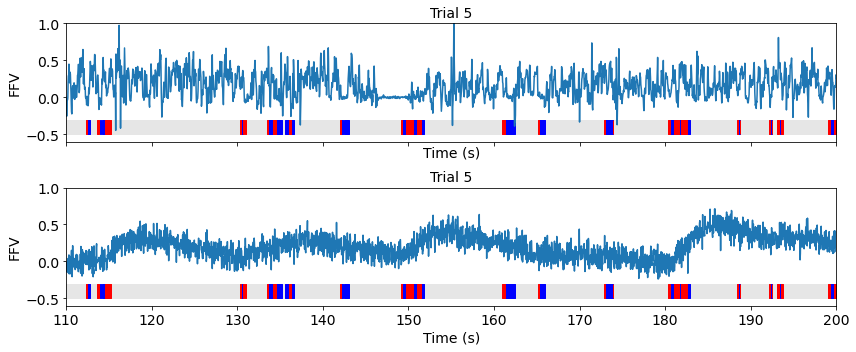

In [5]:
ITR_XPL = 5

df_tr = df_trs[ITR_XPL]
df_tr_lin = df_trs_lin[ITR_XPL]

fig, axs = plt.subplots(2, 1, figsize=(12, 5), tight_layout=True, sharex=True)
axs[0].plot(df_tr['T'], df_tr['FFV'])
axs[1].plot(df_tr_lin['T'], df_tr_lin['FFV'])

sng = np.zeros(len(df_tr), dtype=int)
sng[df_tr['S'] == 1] = 1
sng[(df_tr['P'] == 1) | (df_tr['F'] == 1)] = 2

for ax in axs:
    plot_b(ax, df_tr['T'], sng, extent=[0, df_tr['T'].max(), -.5, -.3], c=[(.9, .9, .9), 'b', 'r'])
    set_plot(ax, x_lim=(110, 200), y_lim=(-.6, 1), x_label='Time (s)', y_label='FFV', title=f'Trial {ITR_XPL}', font_size=14)

Linear-nonlinear response

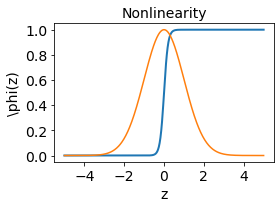

In [6]:
def sgm(z):
    return 1/(1+np.exp(-10*z))

rz = np.linspace(-5, 5, 501)
fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
ax.plot(rz, sgm(rz), lw=2)
ax.plot(rz, stats.norm.pdf(rz)/stats.norm.pdf(rz).max())
set_plot(ax, x_label='z', y_label=r'\phi(z)', title='Nonlinearity', font_size=14)

In [7]:
# linear-nonlinear response
df_trs_ln = []

for df_tr in df_trs:
    s = np.array(df_tr['S']).astype(float)
    p = np.array(df_tr['P'] | df_tr['F']).astype(float)
    
    z = signal.fftconvolve(s, H_S, mode='full')[:len(s)]*DT \
        + signal.fftconvolve(p, H_P, mode='full')[:len(s)]*DT
    
    z -= np.mean(z)
    z /= np.std(z)
    
    ffv = sgm(z)
    
    ffv *= np.std(df_tr['FFV'])
    
    ffv += .5*ffv.std()*np.random.randn(len(s))
    
    df_tr_ln = df_tr.copy()
    df_tr_ln['FFV'] = ffv
    df_trs_ln.append(df_tr_ln)

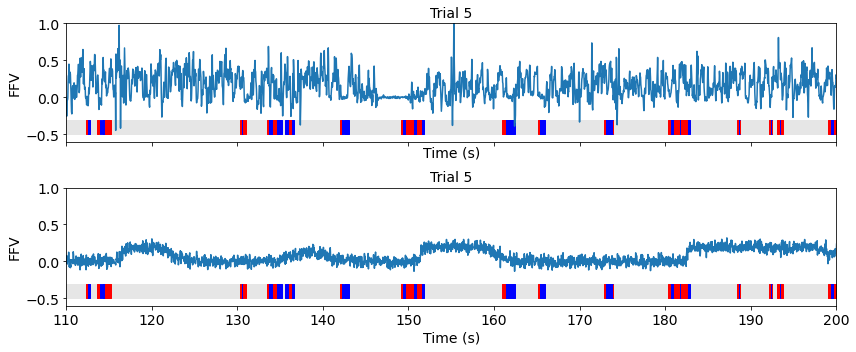

In [8]:
ITR_XPL = 5

df_tr = df_trs[ITR_XPL]
df_tr_ln = df_trs_ln[ITR_XPL]

fig, axs = plt.subplots(2, 1, figsize=(12, 5), tight_layout=True, sharex=True)
axs[0].plot(df_tr['T'], df_tr['FFV'])
axs[1].plot(df_tr_ln['T'], df_tr_ln['FFV'])

sng = np.zeros(len(df_tr), dtype=int)
sng[df_tr['S'] == 1] = 1
sng[(df_tr['P'] == 1) | (df_tr['F'] == 1)] = 2

for ax in axs:
    plot_b(ax, df_tr['T'], sng, extent=[0, df_tr['T'].max(), -.5, -.3], c=[(.9, .9, .9), 'b', 'r'])
    set_plot(ax, x_lim=(110, 200), y_lim=(-.6, 1), x_label='Time (s)', y_label='FFV', title=f'Trial {ITR_XPL}', font_size=14)

Save songs with artificial FFV

In [9]:
pd.concat(df_trs_lin).to_csv('data/simple/c_song_f_behav_lin.csv', index=None)
pd.concat(df_trs_ln).to_csv('data/simple/c_song_f_behav_ln.csv', index=None)

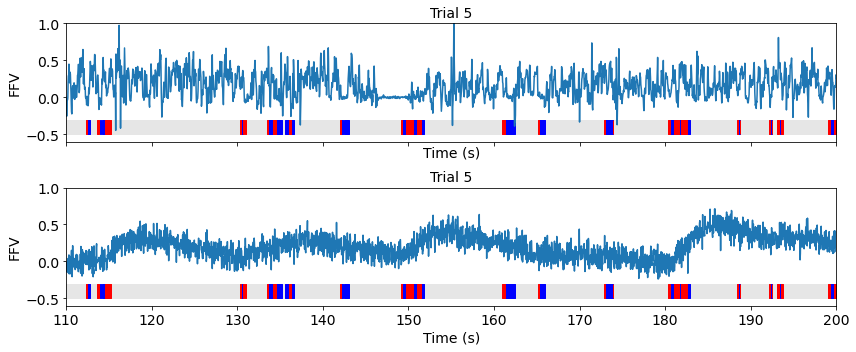

In [10]:
# test load linear
df_trs_lin = None
df_full_lin = pd.read_csv('data/simple/c_song_f_behav_lin.csv')
df_trs_lin = [df_full_lin[df_full_lin['ID'] == ctr] for ctr in range(NTR)]

ITR_XPL = 5

df_tr = df_trs[ITR_XPL]
df_tr_lin = df_trs_lin[ITR_XPL]

fig, axs = plt.subplots(2, 1, figsize=(12, 5), tight_layout=True, sharex=True)
axs[0].plot(df_tr['T'], df_tr['FFV'])
axs[1].plot(df_tr_lin['T'], df_tr_lin['FFV'])

sng = np.zeros(len(df_tr), dtype=int)
sng[df_tr['S'] == 1] = 1
sng[(df_tr['P'] == 1) | (df_tr['F'] == 1)] = 2

for ax in axs:
    plot_b(ax, df_tr['T'], sng, extent=[0, df_tr['T'].max(), -.5, -.3], c=[(.9, .9, .9), 'b', 'r'])
    set_plot(ax, x_lim=(110, 200), y_lim=(-.6, 1), x_label='Time (s)', y_label='FFV', title=f'Trial {ITR_XPL}', font_size=14)

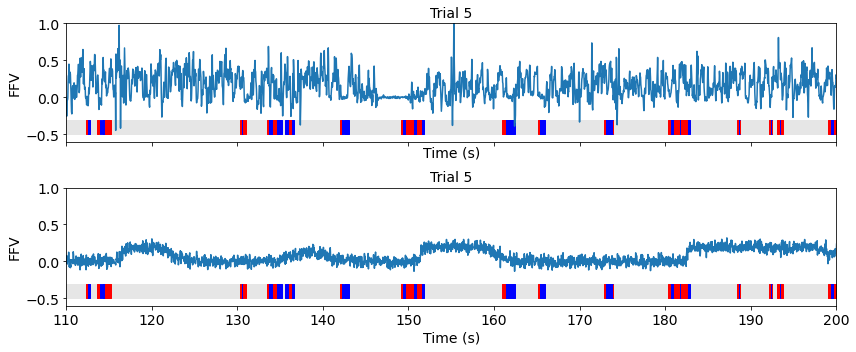

In [11]:
# test load linear-nonlinear
df_trs_ln = None
df_full_ln = pd.read_csv('data/simple/c_song_f_behav_ln.csv')
df_trs_ln = [df_full_ln[df_full_ln['ID'] == ctr] for ctr in range(NTR)]

ITR_XPL = 5

df_tr = df_trs[ITR_XPL]
df_tr_ln = df_trs_ln[ITR_XPL]

fig, axs = plt.subplots(2, 1, figsize=(12, 5), tight_layout=True, sharex=True)
axs[0].plot(df_tr['T'], df_tr['FFV'])
axs[1].plot(df_tr_ln['T'], df_tr_ln['FFV'])

sng = np.zeros(len(df_tr), dtype=int)
sng[df_tr['S'] == 1] = 1
sng[(df_tr['P'] == 1) | (df_tr['F'] == 1)] = 2

for ax in axs:
    plot_b(ax, df_tr['T'], sng, extent=[0, df_tr['T'].max(), -.5, -.3], c=[(.9, .9, .9), 'b', 'r'])
    set_plot(ax, x_lim=(110, 200), y_lim=(-.6, 1), x_label='Time (s)', y_label='FFV', title=f'Trial {ITR_XPL}', font_size=14)